In [2]:
!pip install gensim


   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.0 MB ? eta -:--:--
   -- ------------------------------------- 1.6/24.0 MB 4.9 MB/s eta 0:00:05
   ---- ----------------------------------- 2.6/24.0 MB 5.0 MB/s eta 0:00:05
   ------ --------------------------------- 3.7/24.0 MB 5.1 MB/s eta 0:00:05
   -------- ------------------------------- 5.0/24.0 MB 5.2 MB/s eta 0:00:04
   ---------- ----------------------------- 6.3/24.0 MB 5.4 MB/s eta 0:00:04
   ------------ --------------------------- 7.6/24.0 MB 5.5 MB/s eta 0:00:03
   -------------- ------------------------- 8.9/24.0 MB 5.6 MB/s eta 0:00:03
   ---------------- ----------------------- 10.0/24.0 MB 5.5 MB/s eta 0:00:03
   ----------------- ---------------------- 10.5/24.0 MB 5.5 MB/s eta 0:00:03
   ----------------- ---------------------- 10.5/24.0 MB 5.5 MB/s eta 0:00:03
   ----------------- ---------------------- 10.5/24.0 MB 5.5 MB/s eta 0:00:03
   ------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


In [4]:
! pip install wordcloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sagni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 1: 0.022*"australia" + 0.020*"victoria" + 0.019*"sydney" + 0.019*"trump" + 0.012*"coronavirus" + 0.012*"donald" + 0.010*"border" + 0.009*"china" + 0.009*"records" + 0.008*"years"
Topic 2: 0.021*"covid" + 0.016*"government" + 0.013*"australia" + 0.012*"news" + 0.012*"restrictions" + 0.012*"court" + 0.011*"lockdown" + 0.010*"coronavirus" + 0.008*"morrison" + 0.008*"case"
Topic 3: 0.026*"police" + 0.023*"queensland" + 0.010*"death" + 0.010*"coronavirus" + 0.008*"brisbane" + 0.008*"national" + 0.008*"quarantine" + 0.008*"found" + 0.007*"tasmania" + 0.007*"indigenous"
Topic 4: 0.036*"covid" + 0.023*"coronavirus" + 0.018*"australian" + 0.016*"cases" + 0.010*"says" + 0.009*"health" + 0.008*"election" + 0.007*"minister" + 0.007*"bushfire" + 0.006*"state"
Topic 5: 0.016*"coronavirus" + 0.015*"vaccine" + 0.010*"coast" + 0.009*"scott" + 0.009*"live" + 0.007*"gold" + 0.007*"amid" + 0.006*"west" + 0.006*"speaks" + 0.005*"south"


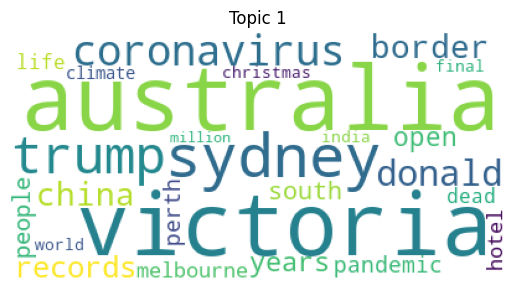

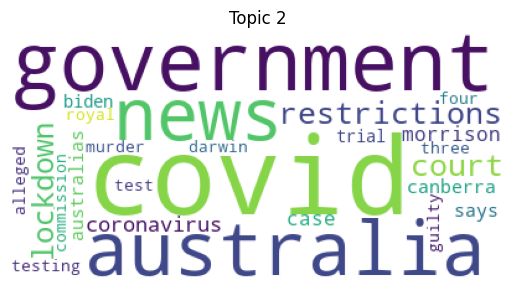

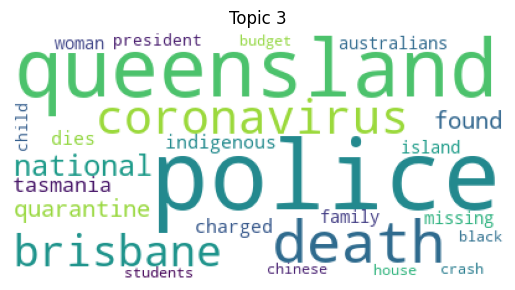

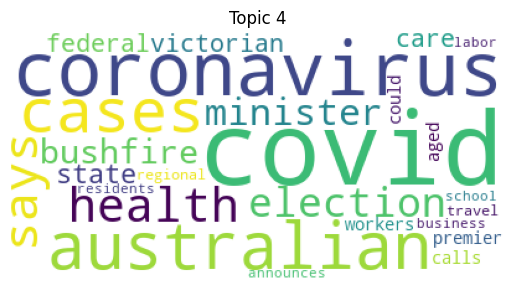

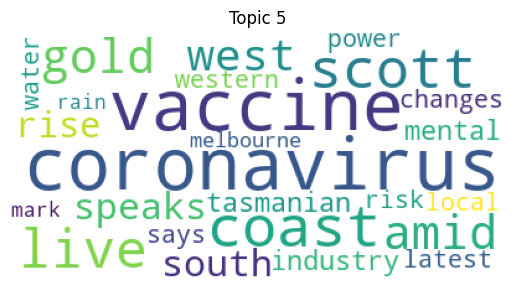

In [6]:
import pandas as pd
import re
import nltk
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download required NLTK data
nltk.download('stopwords')

# Load dataset
df = pd.read_csv(r"C:\Users\sagni\Downloads\Supply Chain Disraption\abcnews-date-text.csv")
df = df.dropna(subset=['headline_text'])

# Initialize tokenizer
tokenizer = TreebankWordTokenizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = tokenizer.tokenize(text)
    return [word for word in tokens if word not in stop_words and len(word) > 3]

df['tokens'] = df['headline_text'].apply(preprocess)

# Create dictionary and corpus
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Build LDA model
lda_model = gensim.models.LdaModel(
    corpus, 
    num_topics=5, 
    id2word=dictionary, 
    passes=10, 
    random_state=42
)

# Print topics
for i, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {i+1}: {topic}")

# WordClouds for topics
for i in range(5):
    plt.figure()
    plt.imshow(WordCloud(background_color='white').fit_words(dict(lda_model.show_topic(i, 25))))
    plt.axis('off')
    plt.title(f'Topic {i+1}')
    plt.show()


C:\Users\sagni\AppData\Local\Temp\ipykernel_25324\1961552978.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = disruption_df.resample('M', on='publish_date').size()


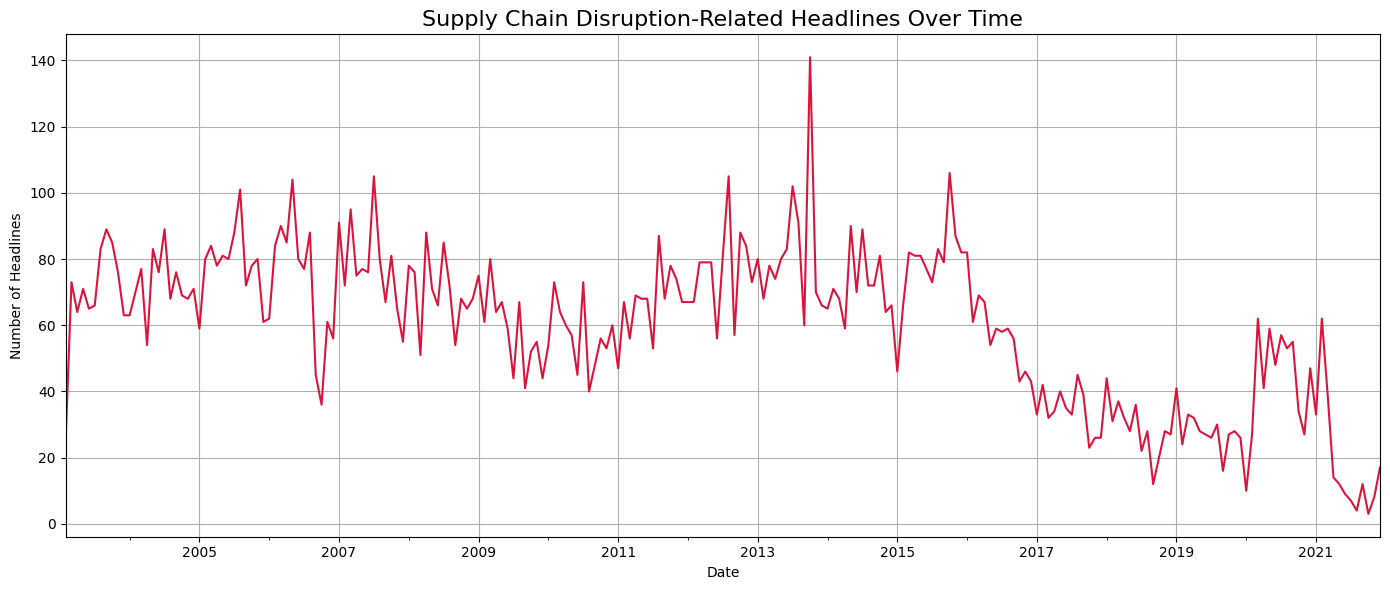

In [7]:
import matplotlib.pyplot as plt

# Convert date column to datetime
df['publish_date'] = pd.to_datetime(df['publish_date'], format='%Y%m%d')

# Define keywords related to supply chain disruptions
keywords = [
    'disruption', 'shortage', 'delay', 'supply', 'chain', 'logistics',
    'shutdown', 'transport', 'cargo', 'container', 'shipment', 'port',
    'warehouse', 'distribution'
]

# Filter headlines mentioning supply chain related terms
def is_disruption(text):
    return any(kw in text for kw in keywords)

df['is_disruption'] = df['tokens'].apply(lambda tokens: is_disruption(tokens))

# Filter relevant rows
disruption_df = df[df['is_disruption']]

# Group by month
monthly_counts = disruption_df.resample('M', on='publish_date').size()

# Plot
plt.figure(figsize=(14, 6))
monthly_counts.plot(kind='line', color='crimson')
plt.title('Supply Chain Disruption-Related Headlines Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Headlines')
plt.grid(True)
plt.tight_layout()
plt.show()
